In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# (a) Plot the training examples in the input space.
def plot_training_samples(x=None,d=None):
    """
    Function to plot the training samples in a 2D space.

    Input:
    - None

    Output:
    - A scatter plot displaying the training samples.
    """
    # TODO: Define x1, x2, x3, x4 and their corresponding labels (C1 and C2)
    # Example:
    # x1 = np.array([0, 0])
    # x2 = np.array([0, 1])
    # x3 = np.array([1, 0])
    # x4 = np.array([1, 1])
    
    # TODO: Create a scatter plot for training samples
    # Hint: Use plt.scatter for plotting the points
    if x is None and d is None:
        x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        d = np.array([1, 1, -1, -1])
    C1 = x[d==1]
    C2 = x[d==-1]

    plt.scatter(C1[:,0],C1[:,1],marker='o',label="C1")
    plt.scatter(C2[:,0],C2[:,1],marker='x',label="C2")
    # Add titles, labels, and legends
    plt.title("Training Samples in the Input Space")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim([-0.5,1.5])
    plt.ylim([-0.5,1.5])
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
# (b) Perceptron learning rule function.
def plr(x, w, d, eta, L, show_w = False):
    """
    Perceptron learning rule function.

    Input:
    - x: np.array of shape (n_samples, n_features) representing input data.
    - w: np.array of shape (n_features,) representing the weights (including bias).
    - d: np.array of shape (n_samples,) representing the desired labels (C1=1, C2=-1).
    - eta: float representing the learning rate.
    - L: int representing the number of iterations.

    Output:
    - w: np.array of shape (n_features,) representing the updated weights after applying the perceptron rule.
    """
    # TODO: Implement the perceptron learning rule
    # Loop over the number of iterations, L
    # For each sample, update the weights using the perceptron rule
    n = x.shape[0]
    for _ in range(L):
        idx = np.arange(n)
        np.random.shuffle(idx)
        for i_sample in idx:
            input = x[i_sample]
            output = np.dot(input,w)
            output = 1 if output >= 0 else -1
            w+= eta*(d[i_sample]-output)*input
            if show_w and i_sample<=5:
                print(f"current weight {w}\n")
    return w


In [11]:
# (c) Apply the perceptron learning rule to the samples.
def train_perceptron(x=None,d=None, show_w = False):
    """
    Function to train the perceptron on the given samples and print the final weights.

    Input:
    - None

    Output:
    - Prints the final weights after training.
    """
    # Define the input data (x1, x2, x3, x4) and labels (C1=1, C2=-1)
    # Example:
    # x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Training data
    # d = np.array([1, 1, -1, -1])  # Labels: C1=1, C2=-1
    
    # Set learning rate and initial weights
    eta = 0.5
    w = np.array([0.0, 0.0, 0.0])  # Initial weights (including bias)

    # TODO: Call the plr function to train the perceptron
    # Hint: Call plr(x, w, d, eta, L) and print the final weights after training
    if x is None and d is None:
        x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        d = np.array([1, 1, -1, -1])
        bias = np.ones((x.shape[0],1))
        x = np.hstack([bias,x])
    w = plr(x,w,d,eta,100,show_w=show_w)
    print(w)
    return w

In [12]:
# (d) Write the decision boundary expression.
def decision_boundary(w,x=None,d=None):
    """
    Function to plot the decision boundary based on the final weights.

    Input:
    - w: np.array of shape (n_features,) representing the final weights (including bias).

    Output:
    - A plot showing the decision boundary.
    """
    # TODO: Calculate and plot the decision boundary based on final weights
    # Equation: w1*x1 + w2*x2 + w0 = 0
    eps = 1e-10 # avoid devide by 0
    x1 = np.linspace(-0.5,1,20)
    x2 = -(w[1]*x1+w[0])/(w[2]+eps)

    plt.plot(x1,x2,label ="decision boundary",color='red')
    plot_training_samples(x=x,d=d)

In [13]:
# (e) Update the training samples and observe results.
def update_samples_and_train():
    """
    Function to update the samples and labels and retrain the perceptron.

    Input:
    - None

    Output:
    - Prints the updated final weights and shows the updated decision boundary.
    """
    # TODO: Update the training samples and labels as per the problem
    # Example:
    # x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Training data
    # d = np.array([1, 1, 1, -1])  # Updated labels
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    bias = np.ones((x.shape[0],1))
    x = np.hstack([bias,x])
    d = np.array([1, -1, -1, 1])
    w = train_perceptron(x,d,show_w=True)
    decision_boundary(w,x=x[:,1:],d=d)
    print(w)
    # Call the perceptron learning rule and plot the updated decision boundary

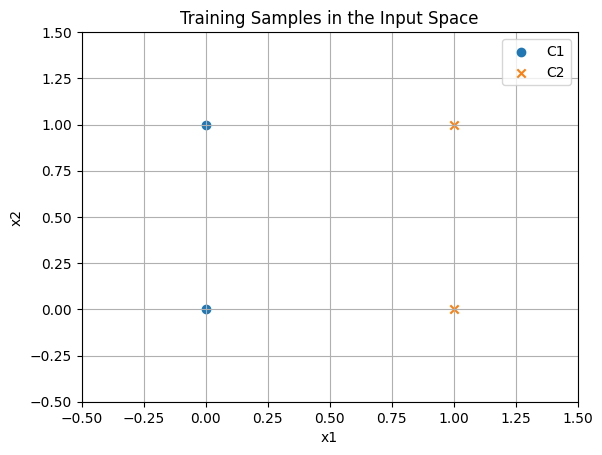

[ 0. -1.  0.]


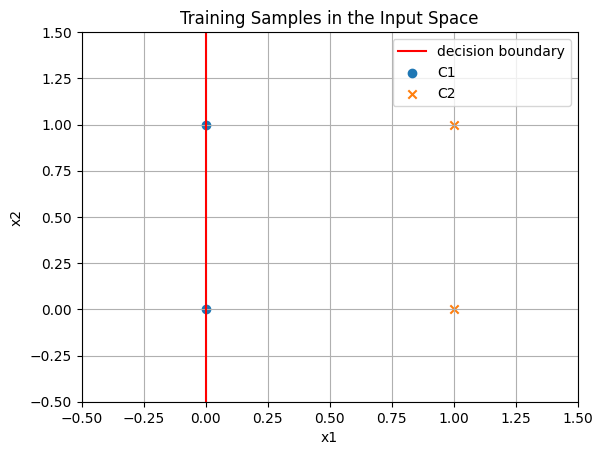

current weight [0. 0. 0.]

current weight [-1. -1.  0.]

current weight [0. 0. 1.]

current weight [-1.  0.  0.]

current weight [-1.  0.  0.]

current weight [0. 0. 0.]

current weight [-1. -1.  0.]

current weight [0. 0. 1.]

current weight [0. 0. 1.]

current weight [0. 0. 1.]

current weight [-1. -1.  1.]

current weight [-2. -1.  0.]

current weight [-1. -1.  0.]

current weight [0. 0. 1.]

current weight [-1.  0.  0.]

current weight [-1.  0.  0.]

current weight [0. 0. 0.]

current weight [0. 0. 0.]

current weight [-1.  0. -1.]

current weight [-1.  0. -1.]

current weight [-1.  0. -1.]

current weight [ 0.  0. -1.]

current weight [1. 1. 0.]

current weight [ 0.  1. -1.]

current weight [ 0.  1. -1.]

current weight [-1.  0. -1.]

current weight [0. 1. 0.]

current weight [0. 1. 0.]

current weight [0. 1. 0.]

current weight [0. 1. 0.]

current weight [-1.  1. -1.]

current weight [-2.  0. -1.]

current weight [-1.  1.  0.]

current weight [0. 1. 0.]

current weight [-1.  1. -

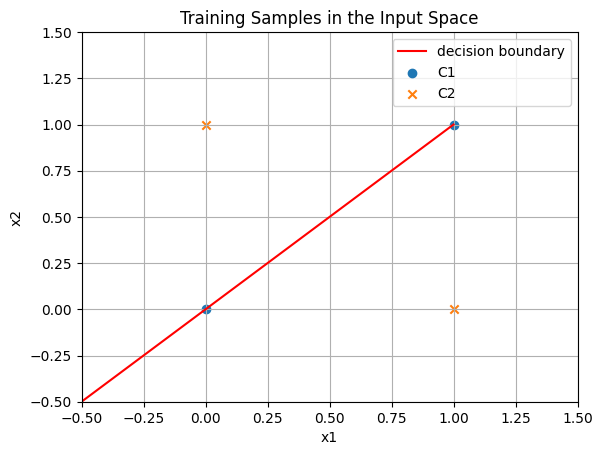

[ 0.  1. -1.]


In [14]:
# Run the steps
plot_training_samples()   # Part (a)
w = train_perceptron()        # Part (c)
decision_boundary(w)
update_samples_and_train() # Part (e)

In e) the perceptron cannot classify the data correctly because this problem is not linearly seperable. The classification result of c) is correct since we set out activation function as a rule where output = 0 means label 1.